In [ ]:
# 1. Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os


In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/data-resampled')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


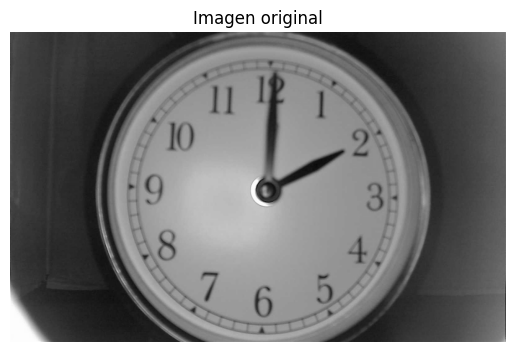

In [ ]:
# Cargar la imagen
imagen = cv2.imread("clock_0200.png")

# Convertir de BGR a RGB para mostrar con matplotlib
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

plt.imshow(imagen_rgb)
plt.title("Imagen original")
plt.axis("off")
plt.show()


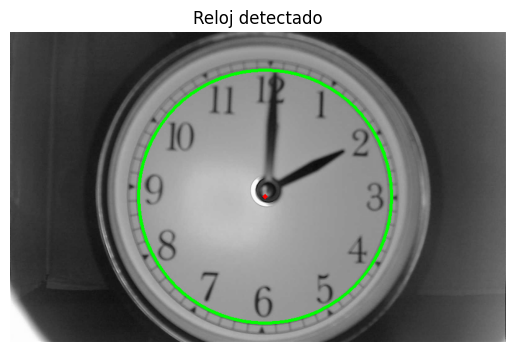

In [ ]:
# Convertir a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar desenfoque para mejorar la detección
gris_blur = cv2.medianBlur(gris, 5)

# Detectar círculos con HoughCircles
circulos = cv2.HoughCircles(
    gris_blur,
    cv2.HOUGH_GRADIENT,
    dp=1.2,              # resolución: aumentar si hay muchos falsos
    minDist=gris.shape[0]//2,  # distancia mínima entre círculos (mitad del alto de la imagen)
    param1=50,          # umbral alto para Canny
    param2=40,           # umbral de acumulador, súbelo para reducir falsos
    minRadius=100,       # radio mínimo esperado (ajústalo según el reloj)
    maxRadius=300        # radio máximo esperado
)


# Convertir a enteros
circulos = np.uint16(np.around(circulos))

# Dibujar el círculo encontrado
img_circulo = imagen_rgb.copy()
for (x, y, r) in circulos[0, :]:
    cv2.circle(img_circulo, (x, y), r, (0, 255, 0), 3)  # círculo exterior
    cv2.circle(img_circulo, (x, y), 2, (255, 0, 0), 3)  # centro

plt.imshow(img_circulo)
plt.title("Reloj detectado")
plt.axis("off")
plt.show()


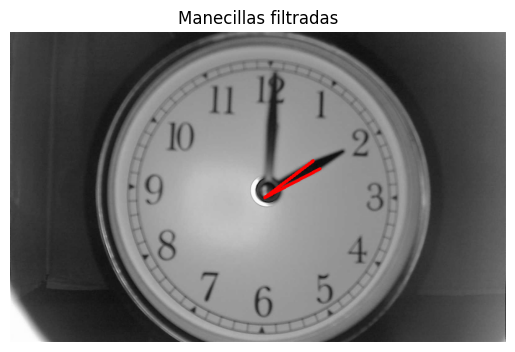